## Задание 1
- Импортируйте библиотеки pandas, numpy и matplotlib.
- Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
- Создайте датафреймы X и y из этих данных.
- Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
- Масштабируйте данные с помощью StandardScaler.
- Постройте модель TSNE на тренировочный данных с параметрами:  
n_components=2, learning_rate=250, random_state=42.
- Постройте диаграмму рассеяния на этих данных.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Load `Boston House Prices dataset`

In [3]:
from sklearn.datasets import load_boston

In [4]:
boston = load_boston()

In [7]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [11]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

#### Create X & y dataframes

In [13]:
X = pd.DataFrame(boston['data'], columns=boston['feature_names'])

In [14]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [15]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [17]:
y = pd.DataFrame(boston['target'], columns=['price'])

In [18]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   506 non-null    float64
dtypes: float64(1)
memory usage: 4.1 KB


In [19]:
y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


#### Split X & y into train and test

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Use StandardScaler to standardize

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaler = StandardScaler()

In [25]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=boston['feature_names'])
X_train_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.287702,-0.500320,1.033237,-0.278089,0.489252,-1.428069,1.028015,-0.802173,1.706891,1.578434,0.845343,-0.074337,1.753505
1,-0.336384,-0.500320,-0.413160,-0.278089,-0.157233,-0.680087,-0.431199,0.324349,-0.624360,-0.584648,1.204741,0.430184,-0.561474
2,-0.403253,1.013271,-0.715218,-0.278089,-1.008723,-0.402063,-1.618599,1.330697,-0.974048,-0.602724,-0.637176,0.065297,-0.651595
3,0.388230,-0.500320,1.033237,-0.278089,0.489252,-0.300450,0.591681,-0.839240,1.706891,1.578434,0.845343,-3.868193,1.525387
4,-0.325282,-0.500320,-0.413160,-0.278089,-0.157233,-0.831094,0.033747,-0.005494,-0.624360,-0.584648,1.204741,0.379119,-0.165787


In [26]:
X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=boston['feature_names'])
X_test_scaled.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.476787,-0.440186,-1.149219,-0.25,-0.348009,0.386286,0.537480,-0.548087,-0.582846,-0.729893,-1.338941,0.413084,-0.608716
1,-0.481548,1.228922,-0.796429,4.00,-0.930972,0.904026,-1.243458,0.167253,-0.692532,-0.967732,-0.780821,0.428606,-1.373038
2,-0.474906,-0.440186,2.392130,-0.25,0.568076,-0.269215,1.048804,-0.937018,-0.692532,1.620178,0.614479,0.353326,0.643885
3,-0.476806,-0.440186,-0.138686,-0.25,-1.245586,-0.145078,-2.116535,0.771841,-0.692532,-0.678928,0.112171,0.362195,-1.096995
4,0.196583,-0.440186,0.951075,-0.25,1.530427,0.206137,0.805317,-0.687076,1.501204,1.365351,0.670291,0.297669,0.532912


#### Create TSNE model

In [27]:
from sklearn.manifold import TSNE

In [31]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)
print(f'Shape of X_train_tsne dataframe: {X_train_tsne.shape}')

Shape of X_train_tsne dataframe: (404, 2)


#### Create scatter plot for visualizing

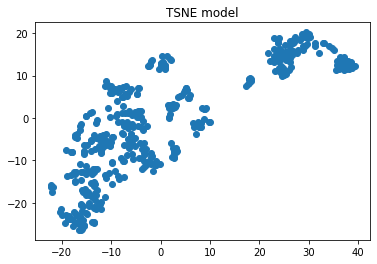

In [37]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.title('TSNE model')
plt.show()

## Задание 2
- С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train. Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
- Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.
- Вычислите средние значения price и CRIM в разных кластерах.

In [33]:
from sklearn.cluster import KMeans

#### Use KMeans to split training data for 3 parts

In [35]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
X_train_kmeans = kmeans.fit_predict(X_train_scaled)

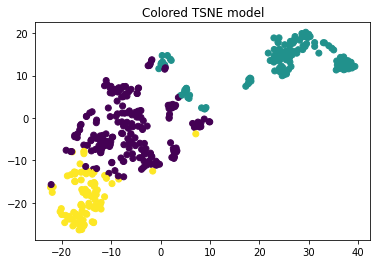

In [39]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=X_train_kmeans)
plt.title('Colored TSNE model')
plt.show()

#### Calculate mean `price` & `CRIM` values for each cluster

In [69]:
CRIM_mean=[]
price_mean=[]
for i in range(3):
    CRIM_mean.append(round(X_train.loc[X_train_kmeans == i, 'CRIM'].mean(), 3))
    price_mean.append(round(y_train.loc[X_train_kmeans == i, 'price'].mean(), 3))
    print(f'Mean "CRIM" value for cluster {i+1}:\t{CRIM_mean[i]}')
    print(f'Mean "price" value for cluster {i+1}:\t{price_mean[i]}')

Mean "CRIM" value for cluster 1:	0.422
Mean "price" value for cluster 1:	24.958
Mean "CRIM" value for cluster 2:	10.797
Mean "price" value for cluster 2:	16.165
Mean "CRIM" value for cluster 3:	0.074
Mean "price" value for cluster 3:	27.788
